# 0. Import Libraries

In [1]:
import os
import openpyxl
import locale
import requests

from bs4 import BeautifulSoup
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont

In [2]:
## Paths
#base_path = r'Grupo GCB\GCB CAPITAL - Documentos\Investimentos\GCB Capital1'
base_path = r'Grupo GCB\GCB CAPITAL - Investimentos\GCB Capital1'
#base_path = r'OneDrive - Grupo GCB'

backoffice_path = os.path.join(os.path.expanduser("~"), base_path + r"\Backoffice")

image_path = os.path.join(os.path.expanduser("~"), backoffice_path + r"\Conteudo_Divulgacao\Templates")
saving_path = os.path.join(os.path.expanduser("~"), backoffice_path + r"\Conteudo_Divulgacao\Imagens\Fechamentos_Diarios")

## Set Locale
locale.setlocale(locale.LC_ALL, 'pt_BR')

## Day
today = datetime.today().strftime('%d.%m.%Y')
print(today)
print(backoffice_path)
print(image_path)
print(saving_path)

03.05.2024
C:\Users\LeonardoDrabikBaranM\Grupo GCB\GCB CAPITAL - Investimentos\GCB Capital1\Backoffice
C:\Users\LeonardoDrabikBaranM\Grupo GCB\GCB CAPITAL - Investimentos\GCB Capital1\Backoffice\Conteudo_Divulgacao\Templates
C:\Users\LeonardoDrabikBaranM\Grupo GCB\GCB CAPITAL - Investimentos\GCB Capital1\Backoffice\Conteudo_Divulgacao\Imagens\Fechamentos_Diarios


# 1. Collect Close Data

Com o BBG funcionando, a coleta dos dados era feita pela planilha "Acompanhamento_Mercado.xlsx", porém com o bloqueio dos dados utiliza-se a ADVFN como fonte de dados.

* Vale mencionar que geralmente o dado do dólar que queremos no fechamento diário é diferente do que aparece no ADVFN, então logo embaixo tem uma célula no qual é possível mudar qualquer valor de qualquer índice e exemplos de cada.

In [3]:
def get_close_data():
    wb_path = os.path.join(os.path.expanduser("~"), backoffice_path + '\Acompanhamento_Mercado.xlsx')
    workbook = openpyxl.load_workbook(wb_path, data_only = True) #read_only = True,
    worksheet = workbook['Fech. Dia']
    
    ## Ibov
    ibov = locale.format_string('%.2f', round(worksheet['D3'].value, 2), grouping=True) + ' PTS'
    ibov_var = locale.format_string('%.2f', round(worksheet['E3'].value * 100, 2), grouping=True) + '%'
    
    ## Small
    small = locale.format_string('%.2f', round(worksheet['D4'].value, 2), grouping=True) + ' PTS'
    small_var = locale.format_string('%.2f', round(worksheet['E4'].value * 100, 2), grouping=True) + '%'
    
    ## Dólar
    dolar = 'R$ ' + locale.format_string('%.4f', round(worksheet['D5'].value, 4), grouping=True)
    dolar_var = locale.format_string('%.2f', round(worksheet['E5'].value * 100, 2), grouping=True) + '%'
    
    ## IFIX
    ifix = locale.format_string('%.2f', round(worksheet['D6'].value, 2), grouping=True) + ' PTS'
    ifix_var = locale.format_string('%.2f', round(worksheet['E6'].value * 100, 2), grouping=True) + '%'
    
    ## S&P 500
    sp500 = locale.format_string('%.2f', round(worksheet['D7'].value, 2), grouping=True) + ' PTS'
    sp500_var = locale.format_string('%.2f', round(worksheet['E7'].value * 100, 2), grouping=True) + '%'
    
    ## Nasdaq
    nsdq = locale.format_string('%.2f', round(worksheet['D10'].value, 2), grouping=True) + ' PTS'
    nsdq_var = locale.format_string('%.2f', round(worksheet['E10'].value * 100, 2), grouping=True) + '%'
    
    ## Selic
    selic = locale.format_string('%.2f', round(worksheet['D9'].value, 2), grouping=True) + '% a.a.'
    # selic = '11,65 % a.a.'
    
    workbook.close()
    
    
    return ibov, ibov_var, small, small_var, dolar, dolar_var, ifix, ifix_var, sp500, sp500_var, nsdq, nsdq_var, selic

In [4]:
ibov, ibov_var, small, small_var, dolar, dolar_var, ifix, ifix_var, sp500, sp500_var, nsdq, nsdq_var, selic = get_close_data()

# 2. Manipulate Template

O template do Fechamento Diário é puxado e são adicionados os dados nas posições respectivas

In [5]:
def add_text_to_image(img, text, position, font_text='arial', font_size=29, text_color='blue'):
    ## Get color
    colors = {'blue': '#183851', 'gold': '#CA9E67'}
    
    if text_color in colors.keys():
        color = colors[text_color]
    else:
        color = text_color

    # Create a drawing context
    draw = ImageDraw.Draw(img)

    # Set the font and color for the text
    font = ImageFont.truetype(font_text, font_size)
    draw.text(position, text, fill=color, anchor="mm", font=font)

    # Save the modified image as a new file
    return img

In [6]:
def var_movement(value_var):
    try:
        value_var = float(value_var.replace(',', '.').replace('%', ''))
    except:
        pass
    
    
    if isinstance(value_var, float) and value_var > 0:
        return '\u25B2'
    elif isinstance(value_var, float) and value_var < 0:
        return '\u25BC'
    else:
        return ''

In [7]:
def var_color(value_var):
    try:
        value_var = float(value_var.replace(',', '.').replace('%', ''))
    except:
        pass
    
    if isinstance(value_var, float) and value_var > 0:
        return 'green'
    elif isinstance(value_var, float) and value_var < 0 :
        return 'red'
    else:
        return 'blue'

In [8]:
## Template
img = Image.open(image_path + '\\template_fechamento.png')

## Parameters
font_text = 'arial'
font_size_values = 38
font_size_var = 42
font_size_mov = 36
text_color = 'blue'


# Data
img = add_text_to_image(img, today, position=(540, 750),
                        font_text='arial',
                        font_size=54,
                        text_color=text_color)

## Ibov
img = add_text_to_image(img, ibov, position=(600, 905),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, ibov_var, position=(860, 905),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(ibov_var))

img = add_text_to_image(img, var_movement(ibov_var), position=(945, 905),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(ibov_var))

## Small
img = add_text_to_image(img, small, position=(600, 1035),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, small_var, position=(860, 1035),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(small_var))

img = add_text_to_image(img, var_movement(small_var), position=(945, 1035),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(small_var))

## Dólar
img = add_text_to_image(img, dolar, position=(600, 1170),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, dolar_var, position=(860, 1170),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(dolar_var))

img = add_text_to_image(img, var_movement(dolar_var), position=(945, 1170),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(dolar_var))

## IFIX
img = add_text_to_image(img, ifix, position=(600, 1295),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, ifix_var, position=(860, 1295),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(ifix_var))

img = add_text_to_image(img, var_movement(ifix_var), position=(945, 1295),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(ifix_var))

## S&P 500
img = add_text_to_image(img, sp500, position=(600, 1435),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, sp500_var, position=(860, 1435),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(sp500_var))

img = add_text_to_image(img, var_movement(sp500_var), position=(945, 1435),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(sp500_var))

## Nasdaq
img = add_text_to_image(img, nsdq, position=(600, 1575),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, nsdq_var, position=(860, 1575),
                        font_text=font_text,
                        font_size=font_size_var,
                        text_color=var_color(nsdq_var))

img = add_text_to_image(img, var_movement(nsdq_var), position=(945, 1575),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(nsdq_var))

## Selic
img = add_text_to_image(img, selic, position=(700, 1785),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

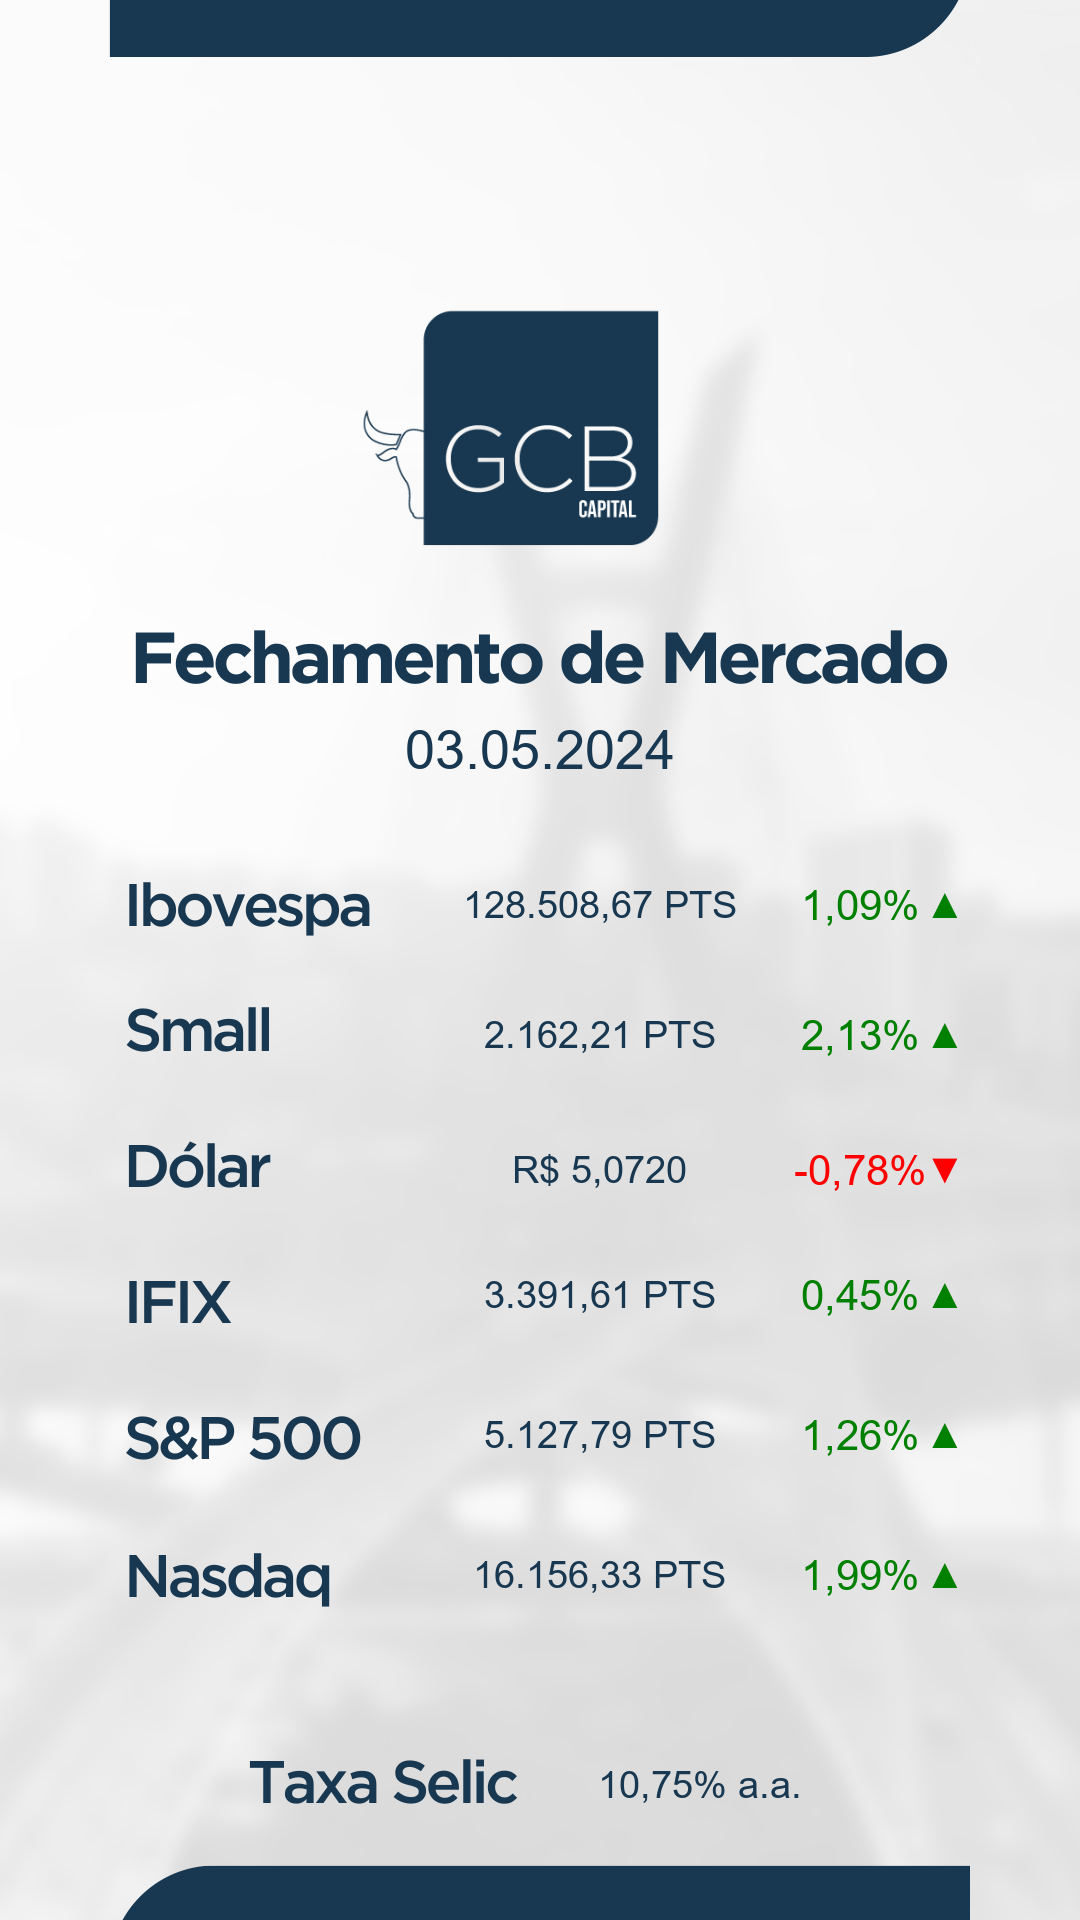

In [9]:
today = datetime.today().strftime('%Y%m%d')

img = img.convert("RGB")
img.save(saving_path + '\Fechamento_' + today + '.png')
img